## Pepsi Stock Analysis

#### Digvijaysinh Desai - 0776134
#### Nishtha Mistry - 0780925
#### Aman Sharma - 0780943

### Q-4) Bolinger Band

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import ta

In [6]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [15, 13]

In [3]:
dt = yf.download("PEP",
                 start= "2021-01-01",
                 end= "2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
dt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,147.009995,147.779999,141.940002,144.270004,138.296753,7486900
2021-01-05,144.070007,145.179993,142.899994,144.699997,138.708923,4126000
2021-01-06,141.669998,143.600006,141.589996,142.929993,137.012192,4843300
2021-01-07,142.809998,143.149994,141.149994,142.470001,136.571274,4473200
2021-01-08,142.470001,144.399994,141.660004,144.179993,138.210464,4312000


<AxesSubplot:title={'center':'Pepsi Stock'}, xlabel='Date'>

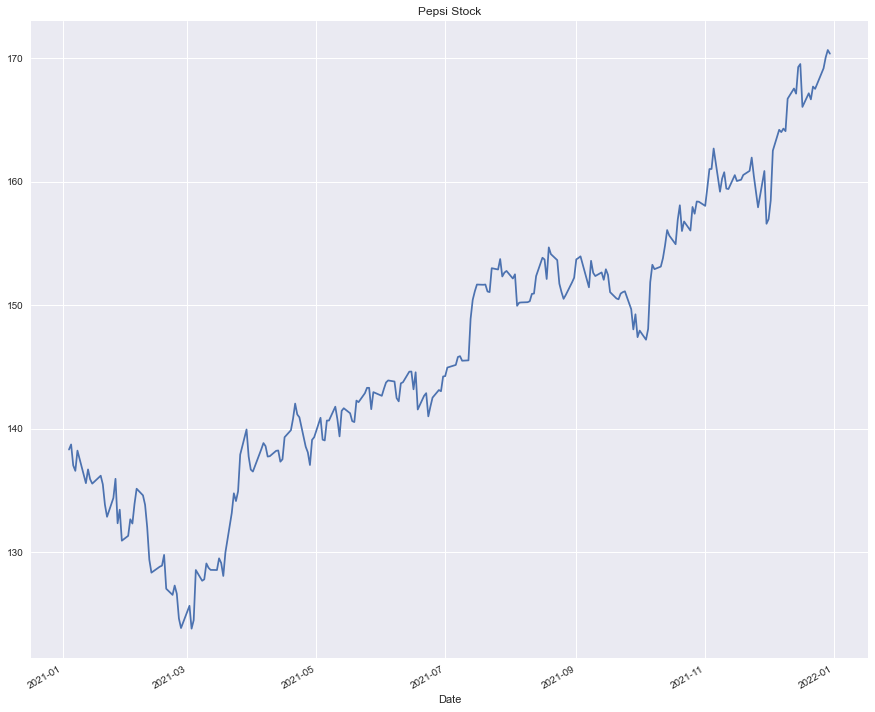

In [8]:
dt["Adj Close"].plot(title="Pepsi Stock")

### Initially, Pepsi stock price is low but price is increasing in a positive manner after May-2021.

In [9]:
#instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=dt['Adj Close'], window=21, window_dev=1)

#Copy as we will be adding columns to it temporarily
ta_dt=dt.copy()

#Adding Bollinger Bands
ta_dt['bb_ma'] = ta_bbands.bollinger_mavg()
ta_dt['bb_high'] = ta_bbands.bollinger_hband()
ta_dt['bb_low'] = ta_bbands.bollinger_lband()

ta_dt.head()

,Open,High,Low,Close,Adj Close,Volume,bb_ma,bb_high,bb_low
Date,,,,,,,,,
2021-01-04,147.009995,147.779999,141.940002,144.270004,138.296753,7486900,NaN,NaN,NaN
2021-01-05,144.070007,145.179993,142.899994,144.699997,138.708923,4126000,NaN,NaN,NaN
2021-01-06,141.669998,143.600006,141.589996,142.929993,137.012192,4843300,NaN,NaN,NaN
2021-01-07,142.809998,143.149994,141.149994,142.470001,136.571274,4473200,NaN,NaN,NaN
2021-01-08,142.470001,144.399994,141.660004,144.179993,138.210464,4312000,NaN,NaN,NaN


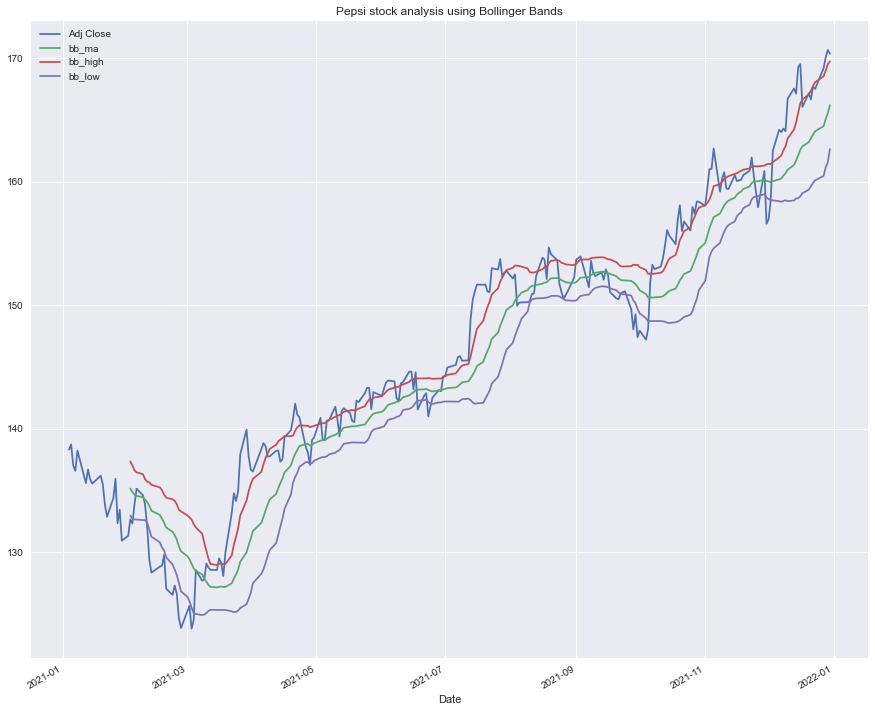

In [10]:
ta_dt[['Adj Close','bb_ma','bb_high','bb_low']].plot(title= "Pepsi stock analysis using Bollinger Bands");

## Q-5) Stock Signals

In [11]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate 
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [12]:
myticker = 'PEP'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start="2021-01-01",end="2022-04-30")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(15)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2021-01-04,138.296768
2021-01-05,138.708939
2021-01-06,137.012207
2021-01-07,136.571259
2021-01-08,138.210464
2021-01-11,136.207016
2021-01-12,135.574326
2021-01-13,136.686310
2021-01-14,135.890671


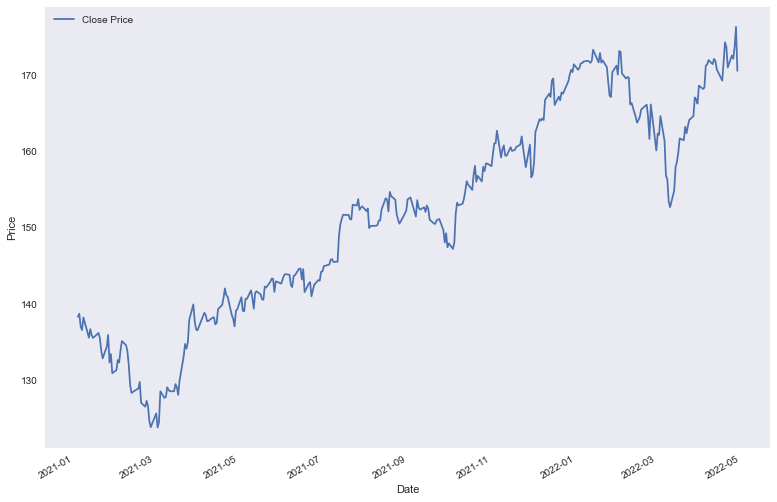

In [13]:
mydata.plot(figsize = (13,9))
plt.grid()
plt.ylabel("Price")
plt.show()

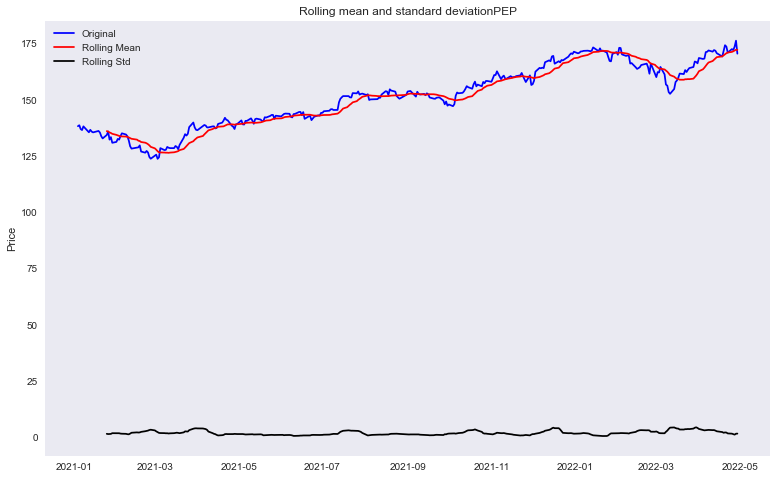

In [14]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata[ 'Close Price' ].rolling(15).std()

plt.figure(figsize = (13, 8))
fig=plt.figure(1)

orig = plt.plot(mydata['Close Price'],color='blue' ,label='Original')
mean = plt.plot (rolling_mean,color='red' , label='Rolling Mean')
std = plt. plot (rolling_std, color='black' ,label= 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation' + myticker)
plt.grid()
plt.ylabel ("Price")
plt. show()

In [15]:
# create 30 days simple moving average column
mydata['SMA30' ] = mydata['Close Price'].rolling(window = 30, min_periods = 1).mean()
# create 90 days simple moving average column
mydata['SMA90' ] = mydata['Close Price' ].rolling(window = 90, min_periods = 1).mean()
# display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2021-01-04,138.296768,138.296768,138.296768
2021-01-05,138.708939,138.502853,138.502853
2021-01-06,137.012207,138.005971,138.005971
2021-01-07,136.571259,137.647293,137.647293
2021-01-08,138.210464,137.759927,137.759927


In [16]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30'] > mydata['SMA90'],1.0,0.0)

In [17]:
mydata['Position'] = mydata['Signal'].diff()

mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2021-01-04,138.296768,138.296768,138.296768,0.0,NaN
2021-01-05,138.708939,138.502853,138.502853,0.0,0.0
2021-01-06,137.012207,138.005971,138.005971,0.0,0.0
2021-01-07,136.571259,137.647293,137.647293,0.0,0.0
2021-01-08,138.210464,137.759927,137.759927,0.0,0.0


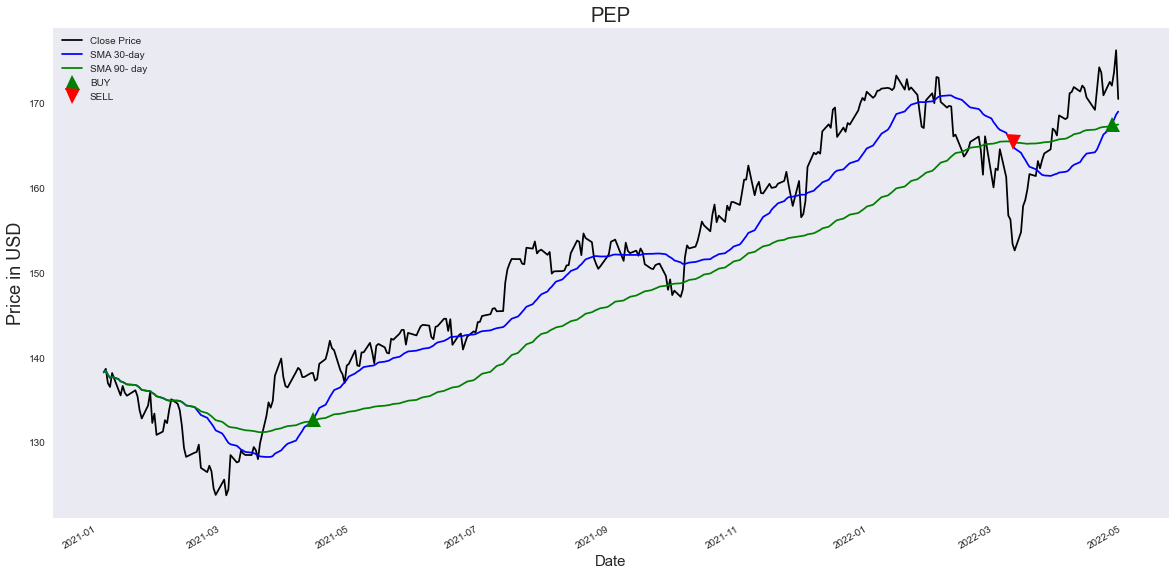

In [18]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', label= 'Close Price')
mydata['SMA30' ].plot(color= 'b', label = 'SMA 30-day ')
mydata['SMA90' ].plot(color = 'g', label = 'SMA 90- day ')
# plot 'buy' signals
plt.plot(mydata[mydata['Position'] == 1].index,
         mydata['SMA30' ][mydata['Position'] == 1],
         '^',markersize = 15, color = 'g', label = 'BUY')

# plot 'sell' signals
plt.plot(mydata[mydata['Position']== -1].index, 
         mydata['SMA90'][mydata['Position'] == -1],
         'v', markersize = 15, color = 'r',label='SELL')
                         
plt.ylabel('Price in USD', fontsize = 18)
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [19]:
df_position = mydata[ (mydata[ 'Position' ] == 1) | (mydata['Position' ] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x== 1 else 'sell')
print (tabulate(df_position, headers = 'keys', tablefmt ='psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2021-04-13 00:00:00 |       138.222 | 132.757 | 132.59  |        1 | Buy        |
| 2022-03-10 00:00:00 |       153.443 | 165.18  | 165.443 |        0 | sell       |
| 2022-04-26 00:00:00 |       172.103 | 167.569 | 167.312 |        1 | Buy        |
+---------------------+---------------+---------+---------+----------+------------+


In [20]:
mydata['EMA30']= mydata['Close Price'].ewm(span = 30, adjust= False).mean()
mydata['EMA90'] = mydata['Close Price'].ewm (span = 90, adjust = False).mean()
mydata['Signal']=0.0
mydata['Signal'] = np.where(mydata['EMA30' ] > mydata['EMA90'], 1.0, 0.0)
mydata['Position']= mydata['Signal'].diff()

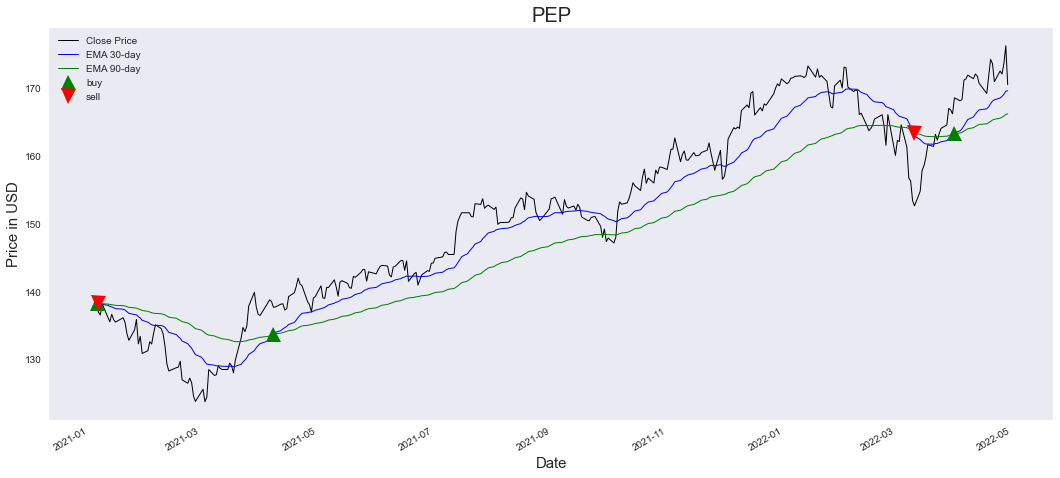

In [21]:
plt.figure(figsize = (18,8))
# plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color= 'k',lw=1, label='Close Price')
mydata['EMA30'].plot(color='b', lw = 1, label='EMA 30-day')
mydata['EMA90'].plot(color='g',lw = 1, label='EMA 90-day')
# plot "buy* and 'sell' signals
plt.plot(mydata[mydata['Position' ] == 1].index,
mydata['EMA30'][mydata['Position' ] == 1],
'^',markersize = 15, color = 'g', label='buy')

plt.plot(mydata[mydata['Position'] == -1].index,
mydata['EMA90'][mydata['Position'] == -1],
'v',markersize = 15, color ='r',label ='sell')


plt.ylabel ('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [22]:
df_position = mydata[ (mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position' ] = df_position['Position' ].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position, headers='keys',tablefmt ='psql'))

+---------------------+---------------+---------+---------+----------+------------+---------+---------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |   EMA30 |   EMA90 |
|---------------------+---------------+---------+---------+----------+------------+---------+---------|
| 2021-01-05 00:00:00 |       138.709 | 138.503 | 138.503 |        1 | Buy        | 138.323 | 138.306 |
| 2021-01-06 00:00:00 |       137.012 | 138.006 | 138.006 |        0 | Sell       | 138.239 | 138.277 |
| 2021-04-08 00:00:00 |       137.729 | 131.407 | 132.342 |        1 | Buy        | 133.763 | 133.732 |
| 2022-03-11 00:00:00 |       152.668 | 164.699 | 165.383 |        0 | Sell       | 162.968 | 163.397 |
| 2022-04-01 00:00:00 |       168.587 | 161.848 | 165.773 |        1 | Buy        | 163.425 | 163.295 |
+---------------------+---------------+---------+---------+----------+------------+---------+---------+


## Q-6) Forecasting

In [23]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader
import matplotlib.pyplot as plt
from prophet import Prophet
plt.style.use('fivethirtyeight')

In [24]:
dfq = DataReader('PEP', data_source='yahoo',start='2021-01-01',end='2021-12-31')

In [25]:
dfq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,147.779999,141.940002,147.009995,144.270004,7486900.0,138.296738
2021-01-05,145.179993,142.899994,144.070007,144.699997,4126000.0,138.708939
2021-01-06,143.600006,141.589996,141.669998,142.929993,4843300.0,137.012222
2021-01-07,143.149994,141.149994,142.809998,142.470001,4473200.0,136.571259
2021-01-08,144.399994,141.660004,142.470001,144.179993,4312000.0,138.210464


In [26]:
dfq=dfq.reset_index()
dfq[['ds','y']]=dfq[['Date','Close']]

In [27]:
dfq.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2021-01-04,147.779999,141.940002,147.009995,144.270004,7486900.0,138.296738,2021-01-04,144.270004
1,2021-01-05,145.179993,142.899994,144.070007,144.699997,4126000.0,138.708939,2021-01-05,144.699997
2,2021-01-06,143.600006,141.589996,141.669998,142.929993,4843300.0,137.012222,2021-01-06,142.929993
3,2021-01-07,143.149994,141.149994,142.809998,142.470001,4473200.0,136.571259,2021-01-07,142.470001
4,2021-01-08,144.399994,141.660004,142.470001,144.179993,4312000.0,138.210464,2021-01-08,144.179993
5,2021-01-11,144.309998,141.690002,144.029999,142.089996,3902700.0,136.206985,2021-01-11,142.089996
6,2021-01-12,142.000000,139.449997,141.630005,141.429993,5150000.0,135.574310,2021-01-12,141.429993
7,2021-01-13,143.240005,141.000000,141.119995,142.589996,4361600.0,136.686295,2021-01-13,142.589996
8,2021-01-14,142.440002,141.070007,141.479996,141.759995,4724700.0,135.890656,2021-01-14,141.759995
9,2021-01-15,142.600006,140.529999,141.449997,141.389999,4309100.0,135.535995,2021-01-15,141.389999


### Model Creation 

In [28]:
model=Prophet()

In [30]:
prophet_df=dfq.drop(['Date','High','Low','Open','Close','Volume','Adj Close'],axis=1)

In [31]:
prophet_df.head()

,ds,y
0,2021-01-04,144.270004
1,2021-01-05,144.699997
2,2021-01-06,142.929993
3,2021-01-07,142.470001
4,2021-01-08,144.179993


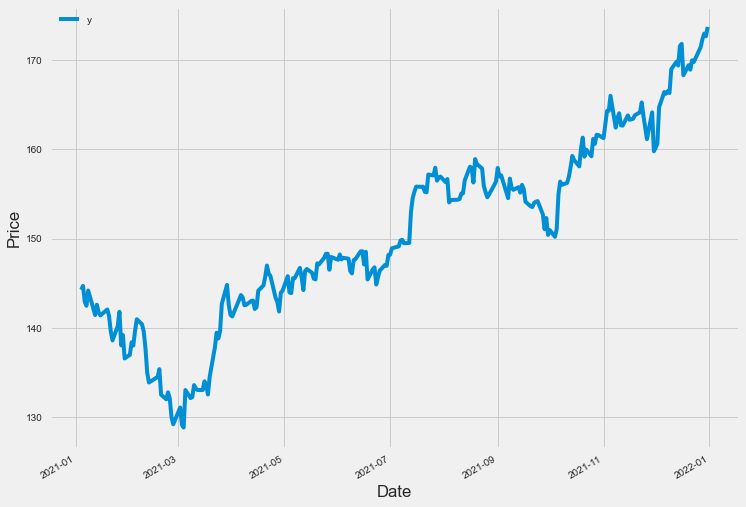

In [32]:
ax=prophet_df.set_index('ds').plot(figsize=(11,9))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [33]:
model.fit(prophet_df)

16:01:19 - cmdstanpy - INFO - Chain [1] start processing
16:01:20 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future=model.make_future_dataframe(periods=365)

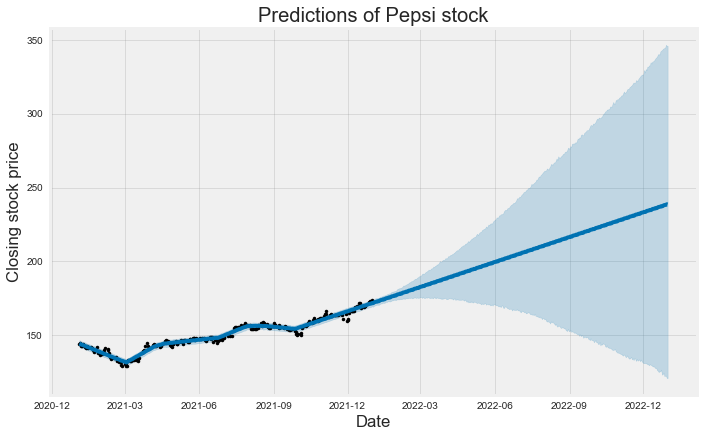

,ds,yhat,yhat_lower,yhat_upper
612,2022-12-27,238.111436,122.171130,344.464584
613,2022-12-28,238.180815,122.551352,344.927021
614,2022-12-29,238.345346,122.458271,346.766871
615,2022-12-30,238.652788,120.887896,345.989476
616,2022-12-31,238.516248,120.848981,346.047159


In [35]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Predictions of Pepsi stock")
plt.xlabel("Date")
plt.ylabel("Closing stock price")
plt.show()

predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

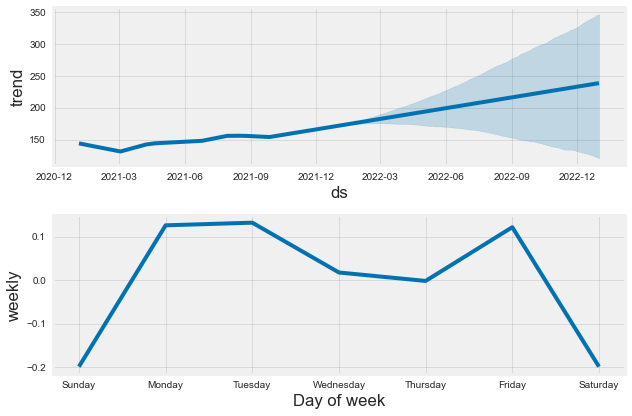

In [36]:
model.plot_components(predictions)
plt.show()

### Pepsi stock price is highest on Friday.